When planning a laser absorption experiment to measure the species time history of a target species, potential interference of other species that absorb at the same wavelength must be considered. This example demonstrates a simplified approach to quantifying absorbance of top forming species predicted by chemical kinetics models given species absorption properties at the target wavelength. 

The simulation parameters for this example are identical to those of the previous example:

In [1]:
from knightshock.kinetics import Simulation

sim = Simulation(
    "gri30.yaml", 1250, 20e5, 
    {"CH4": 0.05, "O2": 0.10, "AR": 0.85}
).run()

## Interfering species

The `get_top_species` function can be used to get a list of potential interfering species sorted by maximum mole fraction. For this example, it is useful to exclude diluents or other species that are not expected to absorb; this can be done using the `exclude` keyword argument.

In [2]:
top_species = sim.get_top_species(10, exclude=["AR", "O2"])
print(top_species)

['H2O', 'CH4', 'CO', 'CO2', 'H2', 'OH', 'H', 'O', 'C2H4', 'CH2O']


## Estimating absorbance

The absorbance for each species can be estimated given the absorption cross-section at a given wavelength; for this example, sample values were used. 

In [3]:
from knightshock.absorption import absorbance

sigma = {
    "H2O": 1e-21, "CH4": 1e-20, "CO": 1e-21, 
    "C2H4": 1e-21, "CH2O": 1e-21
}

A = {
    species: absorbance(
        sim.X(species), sigma[species], sim.T, sim.P
    ) for species in top_species if species in sigma.keys()
}

## Normalizing absorbance

The estimated total absorbance is then calculated from the absorbance contributions of each species at each timestep:

In [4]:
import numpy as np

A_total = np.sum(list(A.values()), axis=0)

which can then be used to normalize the species absorbances:

In [5]:
A_norm = {species: A[species] / A_total for species in A.keys()}

## Plotting absorbance

The normalized absorbances can then be plotted to visualize the interference of other species as the reactions progress:

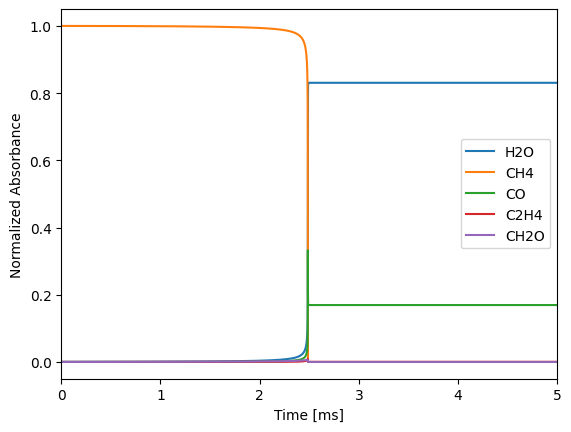

In [6]:
from matplotlib import pyplot as plt

for species in A_norm.keys():
    plt.plot(sim.t * 1e3, A_norm[species], label=species)
    
plt.legend()
plt.ylabel("Normalized Absorbance")
plt.xlabel("Time [ms]")
plt.xlim(0, 5)

plt.show()